# 코로나 이후 매출 증감여부 예측모델
## #01. 패키지 준비하기 


In [9]:
import sys


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

## #02.데이터 셋 준비하기

In [2]:
origin = read_excel("tdf.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   상권_코드        1009 non-null   int64  
 1   상권_코드_명      1009 non-null   object 
 2   점포수_x        1009 non-null   float64
 3   도심_x         1009 non-null   int64  
 4   총_직장_인구_수_x  1009 non-null   float64
 5   총_생활인구_수_x   1009 non-null   float64
 6   점포수_y        1009 non-null   float64
 7   총_직장_인구_수_y  1009 non-null   int64  
 8   총_생활인구_수_y   1009 non-null   float64
 9   매출증감         1009 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 79.0+ KB


## #03. 데이터 전처리
### 결측치 확인


In [3]:
origin.isnull().sum()

상권_코드          0
상권_코드_명        0
점포수_x          0
도심_x           0
총_직장_인구_수_x    0
총_생활인구_수_x     0
점포수_y          0
총_직장_인구_수_y    0
총_생활인구_수_y     0
매출증감           0
dtype: int64

## #04. 탐색적 데이터 분석

## #05. 데이터 셋 분할하기

In [4]:
np.random.seed(777)

### 독립변수와 종속변수 구분

In [5]:
x = origin.drop(['상권_코드','상권_코드_명','매출증감'],axis=1)
x.head()

,점포수_x,도심_x,총_직장_인구_수_x,총_생활인구_수_x,점포수_y,총_직장_인구_수_y,총_생활인구_수_y
0,6.825688,1,21133.770642,1.063927e+06,6.564356,13700,1.108208e+06
1,4.519231,1,10343.230769,3.304633e+06,4.493333,11773,3.704169e+06
2,7.094340,1,43510.654088,2.169122e+06,7.382550,39506,1.775981e+06
3,4.418182,1,8267.454545,2.516156e+06,4.390000,1696,3.109088e+06
4,3.263158,1,2711.131579,3.022949e+05,3.417910,4252,4.745286e+05


In [6]:
y= origin[['매출증감']]

### 데이터 표준화
#### 명목형을 제거한 임시 데이터프레임 생성


In [7]:
tmp = x.drop('도심_x', axis=1)
tmp

,점포수_x,총_직장_인구_수_x,총_생활인구_수_x,점포수_y,총_직장_인구_수_y,총_생활인구_수_y
0,6.825688,21133.770642,1.063927e+06,6.564356,13700,1.108208e+06
1,4.519231,10343.230769,3.304633e+06,4.493333,11773,3.704169e+06
2,7.094340,43510.654088,2.169122e+06,7.382550,39506,1.775981e+06
3,4.418182,8267.454545,2.516156e+06,4.390000,1696,3.109088e+06
4,3.263158,2711.131579,3.022949e+05,3.417910,4252,4.745286e+05
...,...,...,...,...,...,...
1004,3.347826,1999.320652,4.004372e+06,3.603659,2122,5.776149e+06
1005,4.018072,4313.216867,7.342383e+05,4.311765,966,1.371762e+06
1006,5.335484,4582.309677,5.981897e+06,5.780303,2503,7.212605e+06
1007,4.771084,5432.831325,6.812592e+06,4.650685,6064,8.757489e+06


### 임시 데이터 프레임을 활용하여 표준화

In [12]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(tmp)
x_scale_df = pd.DataFrame(x_scale,columns=tmp.columns,index=tmp.index)


In [13]:
x_scale_df['도심']= x['도심_x']
x_scale_df

,점포수_x,총_직장_인구_수_x,총_생활인구_수_x,점포수_y,총_직장_인구_수_y,총_생활인구_수_y,도심
0,1.466482,1.423805,-1.635368,1.082146,0.790915,-1.809769,1
1,0.114631,0.317615,-0.133935,-0.064296,0.578999,-0.461570,1
2,1.623943,3.717765,-0.894809,1.535069,3.628849,-1.462965,1
3,0.055405,0.104818,-0.662271,-0.121498,-0.529187,-0.770622,1
4,-0.621573,-0.464787,-2.145716,-0.659611,-0.248099,-2.138868,1
...,...,...,...,...,...,...,...
1004,-0.571948,-0.537758,0.334939,-0.556788,-0.482339,0.614503,0
1005,-0.179106,-0.300550,-1.856283,-0.164806,-0.609466,-1.672894,0
1006,0.593050,-0.272964,1.660022,0.648123,-0.440440,1.360518,0
1007,0.262246,-0.185773,2.216647,0.022808,-0.048830,2.162846,0


### 훈련데이터와 검증데이터로 분할


In [14]:
x_train,x_test, y_train,y_test = train_test_split(x_scale_df,y,test_size=0.3,random_state=151)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((706, 7), (303, 7), (706, 1), (303, 1))

## #06. 모델개발
### 모델정의

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(7, )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577 (2.25 KB)
Trainable params: 577 (2.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [16]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
23/23 [==============================] - 0s 7ms/step - loss: 0.6975 - acc: 0.5142 - val_loss: 0.6906 - val_acc: 0.5314 - lr: 0.0010
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6916 - acc: 0.5439 - val_loss: 0.6890 - val_acc: 0.5182 - lr: 0.0010
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6892 - acc: 0.5411 - val_loss: 0.6886 - val_acc: 0.5347 - lr: 0.0010
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6873 - acc: 0.5354 - val_loss: 0.6908 - val_acc: 0.5050 - lr: 0.0010
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6859 - acc: 0.5411 - val_loss: 0.6898 - val_acc: 0.5149 - lr: 0.0010
Epoch 6/500
 1/23 [>.............................] - ETA: 0s - loss: 0.6631 - acc: 0.6875
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
23/23 [==============================] - 0s 2ms/step - loss: 0.6841 - acc: 0.5595 - val_loss: 0.6921 - val_acc: 0.

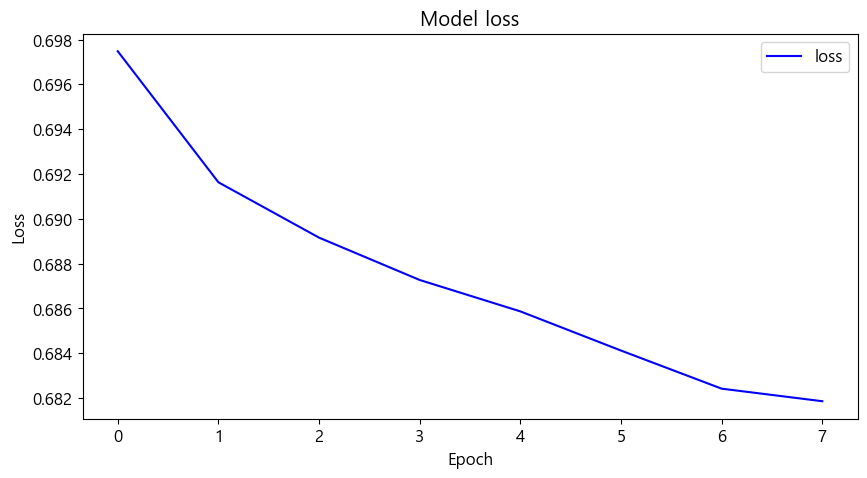

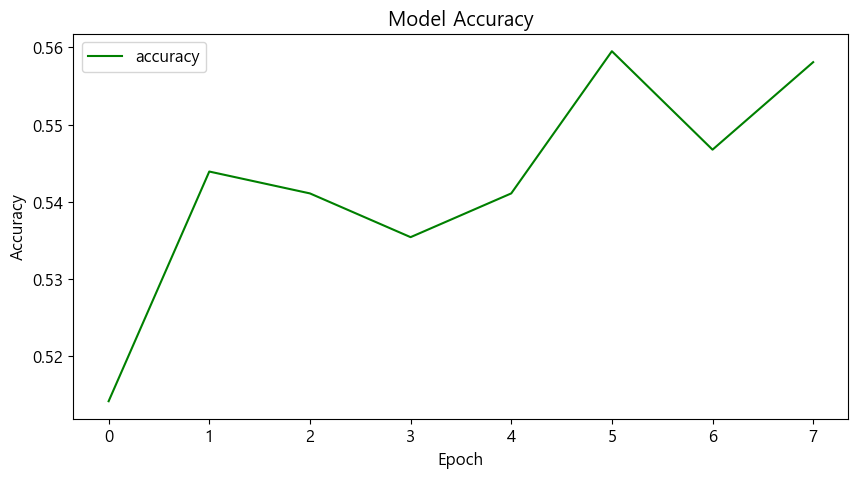

In [26]:
### 모델 손실함수 시각화
plt.plot(result.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 모델 정확도 시각화

plt.plot(result.history['acc'],'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs',inplace=True)
result_df

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.697478,0.514164,0.690578,0.531353,0.0010
2,0.691629,0.543909,0.689031,0.518152,0.0010
3,0.689158,0.541076,0.688571,0.534653,0.0010
4,0.687268,0.535411,0.690785,0.504951,0.0010
5,0.685867,0.541076,0.689772,0.514852,0.0010
6,0.684118,0.559490,0.692144,0.518152,0.0010
7,0.682418,0.546742,0.692518,0.518152,0.0005
8,0.681857,0.558074,0.692190,0.521452,0.0005


In [23]:
import seaborn as sns
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

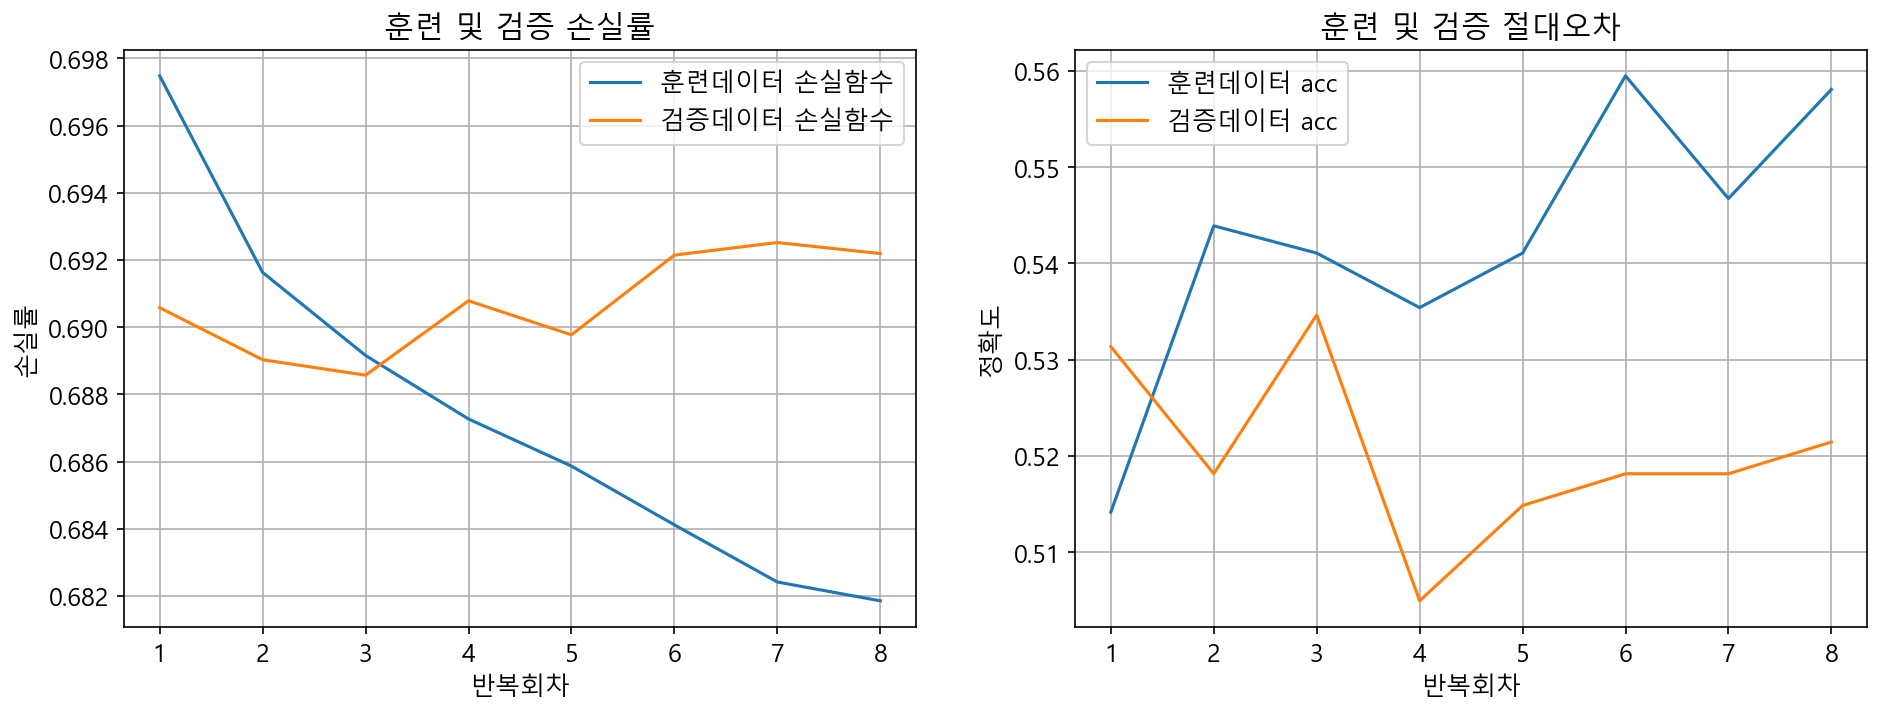

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,5),dpi = 150)
# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index, y='loss',data=result_df,label='훈련데이터 손실함수',ax=ax[0])
sns.lineplot(x=result_df.index,y='val_loss',data=result_df,label='검증데이터 손실함수',ax=ax[0])
ax[0].set_title('훈련 및 검증 손실률')
ax[0].set_xlabel('반복회차')
ax[0].set_ylabel('손실률')
ax[0].grid()
ax[0].legend()
# 2) 훈련 및 검증 절대오차 그리기
sns.lineplot(x=result_df.index , y='acc',data=result_df,label='훈련데이터 acc',ax=ax[1])
sns.lineplot(x=result_df.index, y='val_acc',data=result_df,label='검증데이터 acc',ax=ax[1])
ax[1].set_title('훈련 및 검증 절대오차')
ax[1].set_xlabel('반복회차')
ax[1].set_ylabel('정확도')
ax[1].grid()
ax[1].legend()

plt.show()
plt.close()